数字图像处理 第六次实验记录
# 彩色图像模型及图像编码

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

plt.rcParams['font.sans-serif']=['SimHei']     #正常显示中文标签

def show_img(img, title=None):
    # img = cv2.convertScaleAbs(img)
    if title is not None:
        plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_imgs(img_and_title):
    plt.figure(dpi=150*len(img_and_title))
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="bicubic")
        plt.xticks([])
        plt.yticks([])
    plt.show()

def show_big_imgs(img_and_title):
    plt.figure(dpi=300)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
        plt.xticks([])
        plt.yticks([])
    plt.show()

def show_grayimg(img, title=None):
    if title is not None:
        plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_grayimgs(img_and_title):
    plt.figure(dpi=150)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(img, cmap="gray")
        plt.xticks([])
        plt.yticks([])
    plt.show()

1、彩色图像的颜色空间

A.不同颜色模型的转换

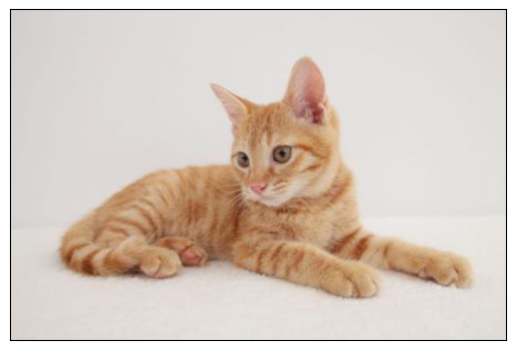

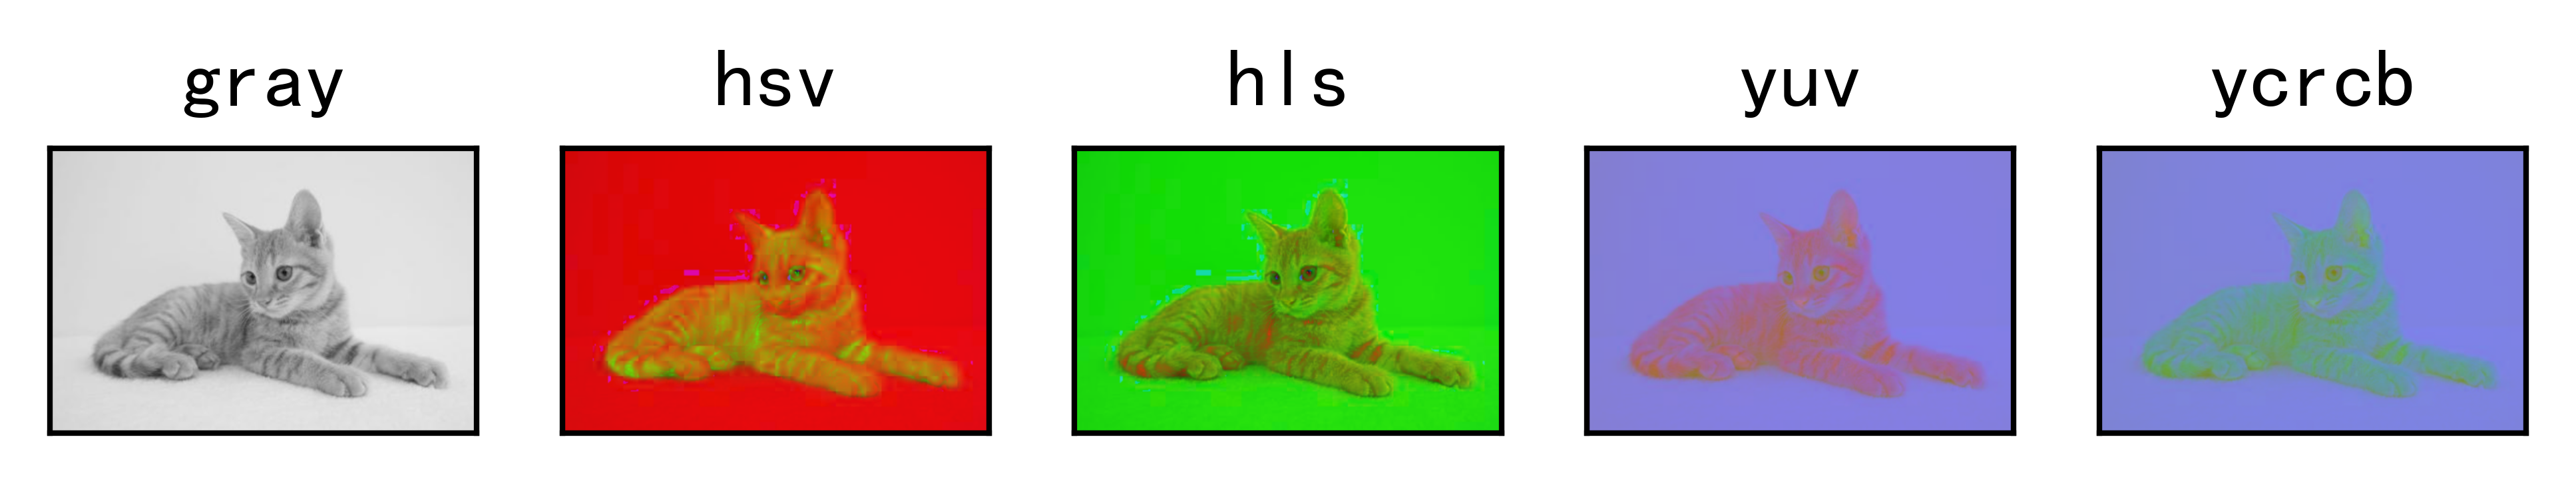

In [2]:
def color_space_demo(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    show_imgs([[gray, "gray"], [hsv, "hsv"], [hls, "hls"], [yuv, "yuv"], [ycrcb, "ycrcb"]])

img = cv2.imread("2.png")
show_img(img)
color_space_demo(img)

B.提取某种颜色

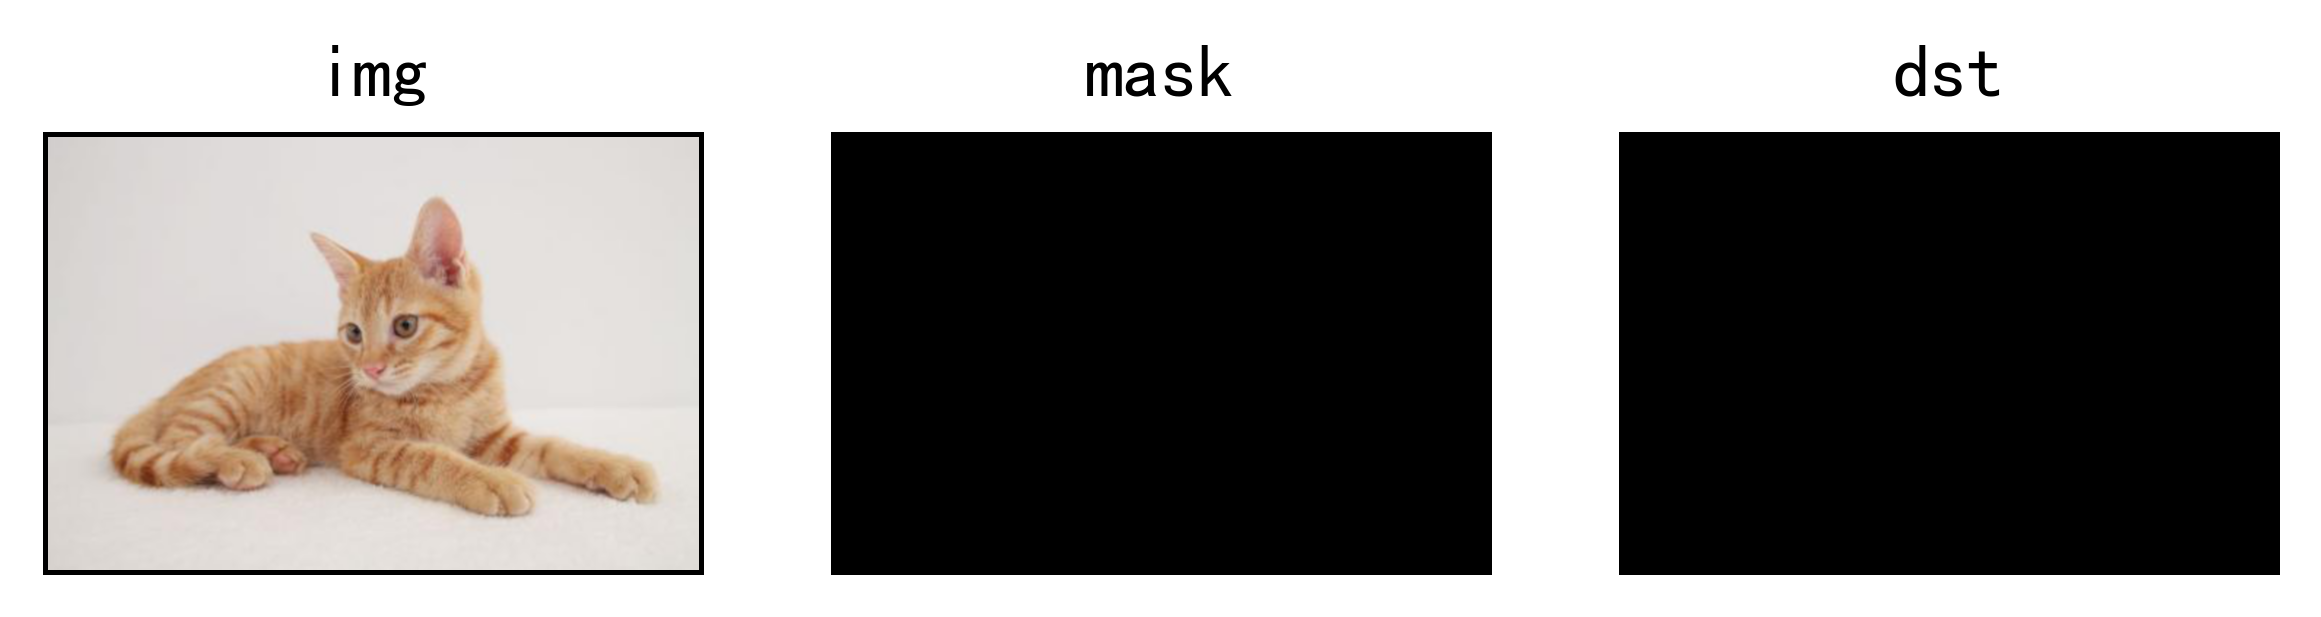

In [3]:
def extract_object_demo(img):
    #将某种颜色的对象显示出来
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_hsv = np.array([26, 43, 46]) # hsv 中 h，s，v 的最小值
    upper_hsv = np.array([34, 255, 255]) # hsv 中的 h，s，v 最大值
    # 提取指定范围颜色，保留指定范围颜色, 其余置为黑(0)
    mask = cv2.inRange(hsv, lowerb=lower_hsv, upperb=upper_hsv)
    # 用 inRange 函数提取指定颜色范围，这里对 hsv 来处理
    dst = cv2.bitwise_and(img, img, mask = mask)
    show_imgs([[img, "img"], [mask, "mask"], [dst, "dst"]])

extract_object_demo(img)

2、JPEG 图像压缩编码

1. 分块

(296, 448, 3)


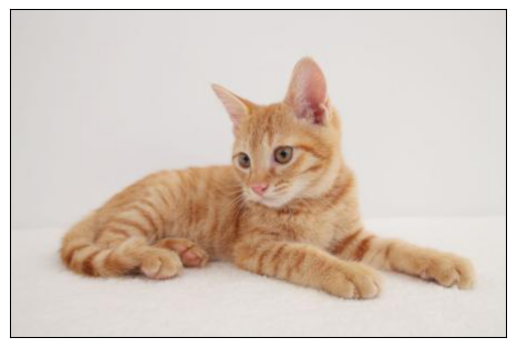

(370, 560, 3)


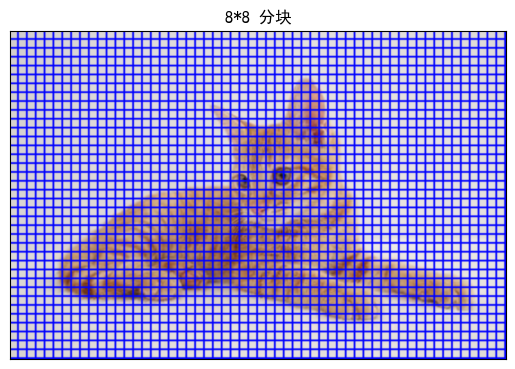

In [4]:
import math
# 将img分块后放进数组里,每个块的大小是8*8
def img2matrix(img, block_size=8):
    shape = (img.shape[0] // block_size, img.shape[1] // block_size)
    matrix = []
    for i in range(0, img.shape[0], block_size):
        for j in range(0, img.shape[1], block_size):
            if img[i:i + block_size, j:j + block_size].shape != (block_size, block_size, 3):
                continue
            matrix.append(img[i:i + block_size, j:j + block_size])
    return matrix, shape
def matrix2img(matrix, shape):
    block_size = matrix[0].shape[0]
    img = np.zeros((block_size * shape[0], block_size * shape[1], 3))
    print(img.shape)
    k = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            img[i * block_size:(i+1)*block_size , j * block_size: (j+1)*block_size] = matrix[k]
            k += 1
    return img.astype(np.uint8)

def show_blocks(matrix, shape, border=2):
    block_size = matrix[0].shape[0]
    img = np.full(((block_size+border) * shape[0], (block_size+border) * shape[1], 3), (255, 0, 0), dtype=np.uint8)
    print(img.shape)
    k = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            img[i * (block_size+border):(i+1)*(block_size+border)-border, j * (block_size+border): (j+1)*(block_size+border)-border] = matrix[k]
            k += 1
    return img.astype(np.uint8)

blocks, shape = img2matrix(img)
show_img(matrix2img(blocks, shape))
show_img(show_blocks(blocks, shape), "8*8 分块")

颜色转换

In [5]:
def my_rgb2yuv(img):
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               img[i, j] = [img[i, j, 0]*0.299+img[i, j, 1]*0.587+img[i, j, 2]*0.114,
                    img[i, j, 0]*-0.169+img[i, j, 1]*-0.3313+img[i, j, 2]*0.5,
                    img[i, j, 0]*0.5+img[i, j, 1]*-0.4187+img[i, j, 2]*-0.0813
               ]
     return img
# blocks_yuv = [ my_rgb2yuv(item).astype(np.float32) for item in blocks]
blocks_yuv = [ cv2.cvtColor(item.astype(np.float32), cv2.COLOR_BGR2YUV) for item in blocks]
print(blocks_yuv[0])
# show_img(matrix2img(blocks_yuv, shape), "RGB->YUV")

[[[206.082      -0.5243444   3.0590854]
  [206.082      -0.5243444   3.0590854]
  [206.082      -0.5243444   3.0590854]
  [207.082      -0.5243444   3.0590854]
  [207.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]]

 [[206.082      -0.5243444   3.0590854]
  [206.082      -0.5243444   3.0590854]
  [206.082      -0.5243444   3.0590854]
  [207.082      -0.5243444   3.0590854]
  [207.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]]

 [[206.082      -0.5243444   3.0590854]
  [206.082      -0.5243444   3.0590854]
  [206.082      -0.5243444   3.0590854]
  [207.082      -0.5243444   3.0590854]
  [207.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]
  [208.082      -0.5243444   3.0590854]]

 [[206.082      -0.5243444   3.059

DCT 变换

In [6]:
# 对blocks做DCT变换
# [Y_dct, U_dct, V_dct]
dct_res = [[cv2.dct(item[:, :, 0]) for item in blocks_yuv],
           [cv2.dct(item[:, :, 1]) for item in blocks_yuv],
           [cv2.dct(item[:, :, 2]) for item in blocks_yuv]]
print(len(dct_res[0]))
print(dct_res[0][0], "\n\n", dct_res[1][0], "\n\n", dct_res[2][0])

2072
[[ 1.6566560e+03 -6.6972213e+00  0.0000000e+00  9.7412711e-01
   0.0000000e+00  6.5089089e-01  0.0000000e+00 -1.3321601e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e

色度和亮度的量化

In [7]:
def quantize_block(block, quantization_table):
    # 进行量化
    quantized_block = np.round(block.astype(np.int64) / quantization_table)
    return quantized_block

def generate_luminance_quant_table(quality):
    """生成亮度量化表"""
    # 标准JPEG亮度量化表
    q = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]
    ])
    if quality < 50:
        quality = 5000 / quality
    else:
        quality = 200 - quality * 2

    quant_table = np.floor((q * quality + 50) / 100)
    quant_table = np.clip(quant_table, 1, 255)
    return quant_table

def generate_chrominance_quant_table(quality):
    """生成色度量化表"""
    # 标准JPEG色度量化表
    c = np.array([
        [17, 18, 24, 47, 99, 99, 99, 99],
        [18, 21, 26, 66, 99, 99, 99, 99],
        [24, 26, 56, 99, 99, 99, 99, 99],
        [47, 66, 99, 99, 99, 99, 99, 99],
        [99, 99, 99, 99, 99, 99, 99, 99],
        [99, 99, 99, 99, 99, 99, 99, 99],
        [99, 99, 99, 99, 99, 99, 99, 99],
        [99, 99, 99, 99, 99, 99, 99, 99]
    ])
    if quality < 50:
        quality = 5000 / quality
    else:
        quality = 200 - quality * 2

    quant_table = np.floor((c * quality + 50) / 100)
    quant_table = np.clip(quant_table, 1, 255)
    return quant_table
quality = 90
# JPEG 标准色度量化表
luminance_table = generate_luminance_quant_table(quality)
# JPEG 标准亮度量化表
chrominance_table = generate_chrominance_quant_table(quality)

quantized_y_res = np.array([quantize_block(block, chrominance_table) for block in dct_res[0]]).astype(np.int64)
quantized_u_res = np.array([quantize_block(block, luminance_table) for block in dct_res[1]]).astype(np.int64)
quantized_v_res = np.array([quantize_block(block, luminance_table) for block in dct_res[2]]).astype(np.int64)
print(quantized_y_res[0], quantized_u_res[0], quantized_v_res[0])

[[552  -2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]] [[-1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]] [[8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


按Z字行游程编码

In [8]:
def zigzag_order(matrix):
    # 获取矩阵的大小
    rows, cols = matrix.shape

    # 初始化结果列表
    result = []

    # 从左上角开始
    for i in range(rows + cols - 1):
        if i % 2 == 0:  # 偶数阶段向上
            row = min(i, rows - 1)
            col = max(0, i - rows + 1)
            while row >= 0 and col < cols:
                result.append(matrix[row, col])
                row -= 1
                col += 1
        else:  # 奇数阶段向下
            row = max(0, i - cols + 1)
            col = min(i, cols - 1)
            while row < rows and col >= 0:
                result.append(matrix[row, col])
                row += 1
                col -= 1

    return result

def run_length_encode_zigzag(image):
    # 获取按照Z字形排序后的一维数组
    zigzag_order_array = zigzag_order(image)

    # 初始化游程编码列表
    run_length_code = []

    # 初始化计数器和当前值
    count = 1
    current_value = zigzag_order_array[0]

    # 遍历Z字形排序后的数组
    for i in range(1, len(zigzag_order_array)):
        if zigzag_order_array[i] == current_value:
            # 值相同，增加计数器
            count += 1
        else:
            # 值不同，将当前值和计数器添加到游程编码列表中
            run_length_code.append((current_value, count))
            # 重置计数器和当前值
            count = 1
            current_value = zigzag_order_array[i]

    # 添加最后一个值的游程编码
    run_length_code.append((current_value, count))

    return run_length_code


print(quantized_y_res[0].shape, len(quantized_y_res))
coded_res_y = [run_length_encode_zigzag(block) for block in quantized_y_res]
coded_res_u = [run_length_encode_zigzag(block) for block in quantized_u_res]
coded_res_v = [run_length_encode_zigzag(block) for block in quantized_v_res]
print(quantized_y_res[0], coded_res_y[0])

(8, 8) 2072
[[552  -2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]] [(552, 1), (-2, 1), (0, 62)]


哈夫曼树测试

In [9]:
class Node:
    def __init__(self, value, freq):
        self.value = value
        self.freq = freq
        self.left = None
        self.right = None

def calculate_frequency(arr):
    freq = {}
    for item in arr:
        if item in freq:
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

def build_huffman_tree(freq):
    nodes = [Node(value, freq) for value, freq in freq.items()]
    while len(nodes) > 1:
        nodes = sorted(nodes, key=lambda x: x.freq)
        left = nodes.pop(0)
        right = nodes.pop(0)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        nodes.append(merged)
    return nodes[0]

def generate_codes(node, prefix="", code={}):
    if node is not None:
        if node.value is not None:
            code[node.value] = prefix
        generate_codes(node.left, prefix + "0", code)
        generate_codes(node.right, prefix + "1", code)
    return code

def encode(arr, code):
    return ''.join([code[item] for item in arr])

def decode(encoded_str, root):
    result = []
    node = root
    for digit in encoded_str:
        if digit == '0':
            node = node.left
        else:
            node = node.right
        if node.left is None and node.right is None:
            result.append(node.value)
            node = root
    return result

# 使用示例
arr = [10, 20, 10, 30, 20, 20]
freq = calculate_frequency(arr)
root = build_huffman_tree(freq)
codes = generate_codes(root)
encoded_str = encode(arr, codes)
decoded_arr = decode(encoded_str, root)

print("原数组:", arr)
print("哈夫曼编码:", encoded_str)
print("解码后数组:", decoded_arr)


原数组: [10, 20, 10, 30, 20, 20]
哈夫曼编码: 110111000
解码后数组: [10, 20, 10, 30, 20, 20]


将游程编码元组拆开,以便哈夫曼树编码

In [10]:
# 拆开元组数组
def unpack_mycodes(mycodess):
    res = []
    for mycodes in mycodess:
        for mycode in mycodes:
            res.append(mycode[0])
            res.append(mycode[1])
    return res
# 拆开单个元组
def unpack_mycode(mycodes):
    res = []
    for mycode in mycodes:
        res.append(mycode[0])
        res.append(mycode[1])
    return res
# 还原单个元组
def pack_mycode(data):
    res = []
    for i in range(0, len(data), 2):
        res.append((data[i], data[i+1]))
    return res

huffman_freq_y = calculate_frequency(unpack_mycodes(coded_res_y))
huffman_tree_y = build_huffman_tree(huffman_freq_y)
huffman_code_y = generate_codes(huffman_tree_y)
# 测试哈夫曼对游程编码进行编码和解码
huffman_res_y0 = encode(unpack_mycode(coded_res_y[0]), huffman_code_y)
print("测试哈夫曼对游程编码进行编码和解码", coded_res_y[0]==pack_mycode(decode(huffman_res_y0, huffman_tree_y)))
# 对Y进行编码
huffman_res_y = [encode(unpack_mycode(item), huffman_code_y) for item in coded_res_y]

# 对U进行哈夫曼编码
huffman_freq_u = calculate_frequency(unpack_mycodes(coded_res_u))
huffman_tree_u = build_huffman_tree(huffman_freq_u)
huffman_code_u = generate_codes(huffman_tree_u)
huffman_res_u = [encode(unpack_mycode(item), huffman_code_u) for item in coded_res_u]

# 对V进行哈夫曼编码
huffman_freq_v = calculate_frequency(unpack_mycodes(coded_res_v))
huffman_tree_v = build_huffman_tree(huffman_freq_v)
huffman_code_v = generate_codes(huffman_tree_v)
huffman_res_v = [encode(unpack_mycode(item), huffman_code_v) for item in coded_res_v]

huffman_res_len_sum = sum([len(item) for item in huffman_res_y]) + sum([len(item) for item in huffman_res_u]) + sum([len(item) for item in huffman_res_v])

# 对比压缩前后结果
before_sz = shape[0]*shape[1]*8*8*1*3
after_sz = huffman_res_len_sum // 8
print("图像编码前：", before_sz, "字节")
print("图像编码后：", after_sz, "字节")
print("压缩比 {}:1".format(before_sz // after_sz))

测试哈夫曼对游程编码进行编码和解码 True
图像编码前： 397824 字节
图像编码后： 27343 字节
压缩比 14:1


哈夫曼解码

In [11]:
decode_res_y = [pack_mycode(decode(item, huffman_tree_y)) for item in huffman_res_y]
print("测试Y解码", decode_res_y==coded_res_y)
decode_res_u = [pack_mycode(decode(item, huffman_tree_u)) for item in huffman_res_u]
print("测试U解码", decode_res_u==coded_res_u)
decode_res_v = [pack_mycode(decode(item, huffman_tree_v)) for item in huffman_res_v]
print("测试V解码", decode_res_v==coded_res_v)

测试Y解码 True
测试U解码 True
测试V解码 True


解Z字形编码

In [12]:
def zigzag_order_decode(encoded_array, rows, cols):
    # 初始化矩阵
    matrix = np.zeros((rows, cols), dtype=encoded_array.dtype)

    index = 0
    for i in range(rows + cols - 1):
        if i % 2 == 0:  # 偶数阶段向上
            row = min(i, rows - 1)
            col = max(0, i - rows + 1)
            while row >= 0 and col < cols:
                matrix[row, col] = encoded_array[index]
                row -= 1
                col += 1
                index += 1
        else:  # 奇数阶段向下
            row = max(0, i - cols + 1)
            col = min(i, cols - 1)
            while row < rows and col >= 0:
                matrix[row, col] = encoded_array[index]
                row += 1
                col -= 1
                index += 1

    return matrix

def run_length_decode_zigzag(encoded_data, rows, cols):
    # 从游程编码中恢复一维数组
    decoded_array = []
    for value, count in encoded_data:
        decoded_array.extend([value] * int(count))

    # 将一维数组转换回原始矩阵
    return zigzag_order_decode(np.array(decoded_array), rows, cols)


decodedecoded_y = np.array([run_length_decode_zigzag(item, 8, 8) for item in decode_res_y])
print("测试YZ字行解码", (decodedecoded_y==quantized_y_res).all())
decodedecoded_u = np.array([run_length_decode_zigzag(item, 8, 8) for item in decode_res_u])
print("测试UZ字行解码", (decodedecoded_u==quantized_u_res).all())
decodedecoded_v = np.array([run_length_decode_zigzag(item, 8, 8) for item in decode_res_v])
print("测试VZ字行解码", (decodedecoded_v==quantized_v_res).all())

测试YZ字行解码 True
测试UZ字行解码 True
测试VZ字行解码 True


反量化

In [13]:
def unquantize_block(block, quantization_table):
    # 进行反量化
    quantized_block = block.astype(np.int64) * quantization_table
    return quantized_block

unquantize_res_y = [unquantize_block(block, chrominance_table) for block in decodedecoded_y]
print(unquantize_res_y[0], "\n\n", dct_res[0][0])
unquantize_res_u = [unquantize_block(block, luminance_table) for block in decodedecoded_u]
print(unquantize_res_u[0], "\n\n", dct_res[1][0])
unquantize_res_v = [unquantize_block(block, luminance_table) for block in decodedecoded_v]
print(unquantize_res_v[0], "\n\n", dct_res[2][0])

# unquantize_res_y = [unquantize_block(block, chrominance_table) for block in quantized_y_res]
# unquantize_res_u = [unquantize_block(block, luminance_table) for block in quantized_u_res]
# unquantize_res_v = [unquantize_block(block, luminance_table) for block in quantized_v_res]

[[1656.   -8.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]] 

 [[ 1.6566560e+03 -6.6972213e+00  0.0000000e+00  9.7412711e-01
   0.0000000e+00  6.5089089e-01  0.0000000e+00 -1.3321601e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.000000

逆DCT变换

In [14]:
idct_res_y = [cv2.idct(block.astype(np.float64)) for block in unquantize_res_y]
print(idct_res_y[0])
idct_res_u = [cv2.idct(block.astype(np.float64)) for block in unquantize_res_u]
idct_res_v = [cv2.idct(block.astype(np.float64)) for block in unquantize_res_v]

# idct_res_y = [cv2.idct(block.astype(np.float32)) for block in dct_res[0]]
# idct_res_u = [cv2.idct(block.astype(np.float32)) for block in dct_res[1]]
# idct_res_v = [cv2.idct(block.astype(np.float64)) for block in dct_res[2]]

[[205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]
 [205.61296015 205.8241244  206.21430504 206.72410062 207.27589938
  207.78569496 208.1758756  208.38703985]]


重构RGB图像

(296, 448, 3)


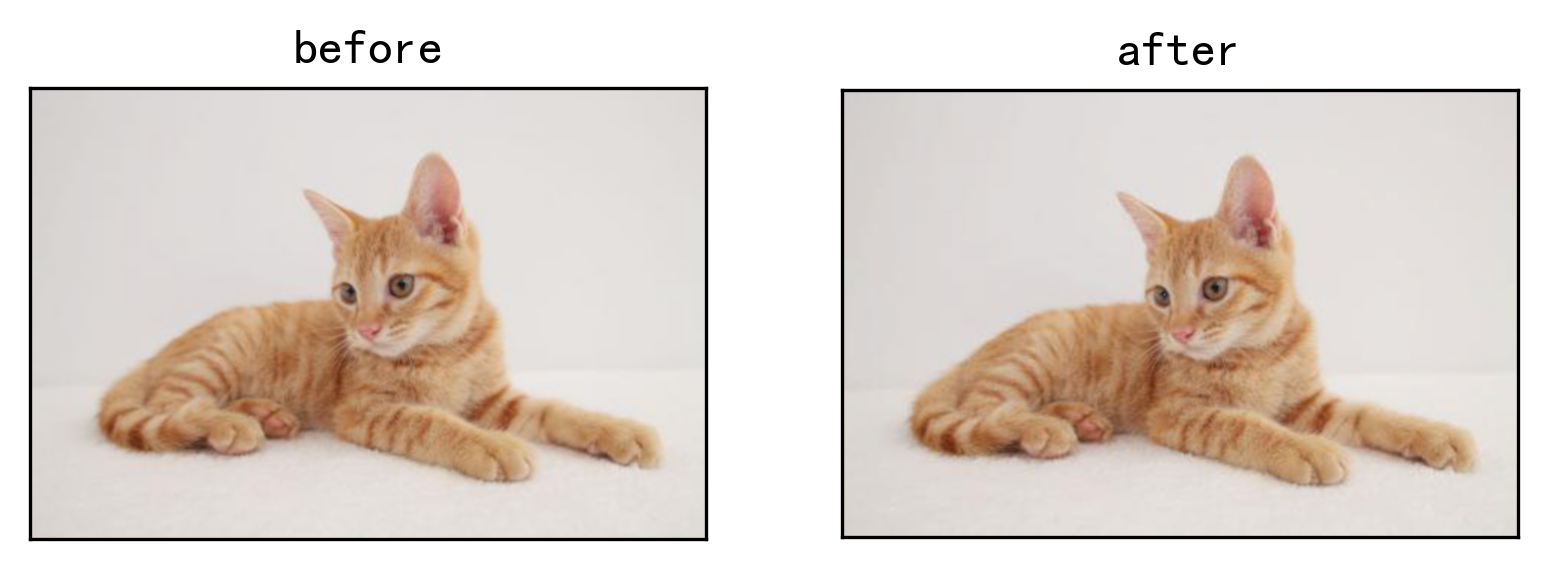

量化质量:90%
图像编码前： 397824 字节
图像编码后： 27343 字节
压缩比 14:1


In [15]:
final_yuv = []
for i in range(len(idct_res_y)):
    final_yuv.append(np.dstack([idct_res_y[i], idct_res_u[i], idct_res_v[i]]))
final_rgb = [cv2.cvtColor(blcok.astype(np.float32), cv2.COLOR_YUV2BGR) for blcok in final_yuv]
show_imgs([[img, "before"], [matrix2img(final_rgb, shape), "after"]])
print("量化质量:{}%".format(quality))
print("图像编码前：", before_sz, "字节")
print("图像编码后：", after_sz, "字节")
print("压缩比 {}:1".format(before_sz // after_sz))